# Benchmark with the 20 newsgroups dataset

In [1]:
%matplotlib inline
from bioinf_learn.util import measure_performance
from bioinf_learn.util import plotData
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
vectorizer = TfidfVectorizer()
vectors_training = vectorizer.fit_transform(newsgroups_train.data)

newsgroups_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'), categories=categories)
vectors_test = vectorizer.transform(newsgroups_test.data)

In [ ]:
n_neighbors_sklearn = 10
n_neighbors_minHash = 10
returnValuesBursi = measure_performance(vectors_test, n_neighbors_sklearn, n_neighbors_minHash, 
                                        number_of_hashfunctions=[100, 200, 400, 600, 800, 1000])

In [ ]:
plotData(data=returnValuesBursi[9:13], color=["r", "b", "m", "g"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf"],
        xticks=["100", "200", "400", "600", "800", "1000"], ylabel="Time in seconds", number_of_instances=6,
        xlabel="Number of projected dimensions. For minHash theses are the number of hash functions, for lshf the reduction by random projection",
         number_of_features=1, title='Query time: Perform one time 50 queries at once')

In [ ]:


plotData(data=returnValuesBursi[4:9], color=["r", "b", "m", "g", "c"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"], ylabel="Time in seconds", 
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         number_of_instances=6,
        number_of_features=1, title='Query time: performe 50 times one query')



In [ ]:
plotData(data=returnValuesBursi[13:], color=["g", "b", "m", "c"], label=["lhsf", "minHash_exact", "minHash_approx", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"],
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         ylabel="Accuracy", number_of_instances=6,
        number_of_features=1, title='Accuracy', log=False)

In [ ]:
plotData(data=returnValuesBursi[:4], color=["r", "b", "g", "c"], label=["sklearn", "minHash", "lshf", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"], 
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         ylabel="Time in Seconds", number_of_instances=6,
        number_of_features=1, title='Fitting time', log=False)

In [ ]:


n_neighbors_sklearn = 5
n_neighbors_minHash = 5
returnValuesBursi = measure_performance(datasetBursi, n_neighbors_sklearn, n_neighbors_minHash, 
                                        number_of_hashfunctions=[100, 200, 400, 600, 800, 1000], size_of_query=None)



In [ ]:


plotData(data=returnValuesBursi[9:13], color=["r", "b", "m", "g"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf"],
        xticks=["100", "200", "400", "600", "800", "1000"], ylabel="Time in seconds", number_of_instances=6,
        xlabel="Number of projected dimensions, only for lhsf. Rest uses sparse dataset",
         number_of_features=1, title='Query time: search for neighbors for all instances, one call for all')



In [ ]:
plotData(data=returnValuesBursi[4:9], color=["r", "b", "m", "g", "c"], label=["sklearn", "minHash_exact", "minHash_approx", "lhsf", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"], ylabel="Time in seconds", 
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         number_of_instances=6,
        number_of_features=1, title='Query time: search for neighbors for all instances, one call per instance')

In [ ]:
plotData(data=returnValuesBursi[13:], color=["g", "b", "m", "c"], label=["lhsf", "minHash_exact", "minHash_approx", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"],
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         ylabel="Accuracy", number_of_instances=6,
        number_of_features=1, title='Accuracy', log=False)

In [ ]:
plotData(data=returnValuesBursi[:4], color=["r", "b", "g", "c"], label=["sklearn", "minHash", "lshf", "annoy"],
        xticks=["100", "200", "400", "600", "800", "1000"],
         xlabel="Number of projected dimensions, only for lhsf and annoy. Rest uses sparse dataset",
         ylabel="Time in Seconds", number_of_instances=6,
        number_of_features=1, title='Fitting time', log=False)

In [3]:
benchmarkResults200 = benchmarkNearestNeighorAlgorithms(vectors_training, n_neighbors = 10, reduce_dimensions_to=200)
benchmarkResults400 = benchmarkNearestNeighorAlgorithms(vectors_training, n_neighbors = 10, reduce_dimensions_to=400)
benchmarkResults800 = benchmarkNearestNeighorAlgorithms(vectors_training, n_neighbors = 10, reduce_dimensions_to=800)
benchmarkResults1600 = benchmarkNearestNeighorAlgorithms(vectors_training, n_neighbors = 10, reduce_dimensions_to=1600)

In [ ]:
label = ["sklearn", "minHash", "minHash_fast", "lhsf", "annoy", "ball tree", "KDTree", "FLANN", "PANNS", 
        "NearPy", "KGraph", "Nmslib", "RPForest"]
xticks=["200", "400", "800", "1600"]
xlabel="Number of projected dimensions. If dataset could handle sparse data, then no projection is used."
ylabel="Time in seconds"

#### Accuracy

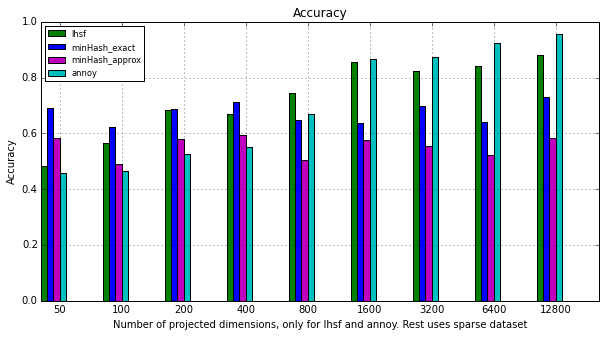

In [10]:
data = [benchmarkResults200[0], benchmarkResults400[0], benchmarkResults800[0], benchmarkResults1600[0]]
title = "Accuracy for 10-neighbors of all instances for sklearn's 20 newsgroups dataset"
plotDataBenchmark(data=data, label=label, xticks=xticks, xlabel=xlabel, ylabel=ylabel, title=title, log=False)

#### Fitting time

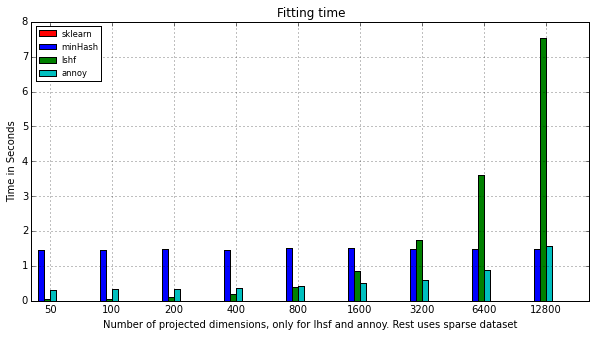

In [11]:
data = [benchmarkResults200[1], benchmarkResults400[1], benchmarkResults800[1], benchmarkResults1600[1]]
title = "Fitting time for sklearn's 20 newsgroups dataset"
plotDataBenchmark(data=data, label=label, xticks=xticks, xlabel=xlabel, ylabel=ylabel, title=title, log=False)

#### Query time for all instances

In [1]:
data = [benchmarkResults200[2], benchmarkResults400[2], benchmarkResults800[2], benchmarkResults1600[2]]
title = "Query time for 10-neighbors of all instances for sklearn's 20 newsgroups dataset"
plotDataBenchmark(data=data, label=label, xticks=xticks, xlabel=xlabel, ylabel=ylabel, title=title)

NameError: name 'benchmarkResults200' is not defined

#### Fitting and query time

In [ ]:
for i in xrange(len(benchmarkResults[1])):
        benchmarkResults[1][i] += benchmarkResults[2][i]
data = [benchmarkResults200[1], benchmarkResults400[1], benchmarkResults800[1], benchmarkResults1600[1]]
title = "Fitting and query time for sklearn's 20 newsgroups dataset"
plotDataBenchmark(data=data, label=label, xticks=xticks, xlabel=xlabel, ylabel=ylabel, title=title, log=False)